# Linear Regression
In the repository you will find the data sets TrainingSet1D.csv and TestSet1D.csv

## 1. Introduction

We loosely follow the book "Machine Learning: A Probabilistic Approach, K. Murphy, 2012, page 219 ff":

Linear Regression (LR) is the "work house" and most popular supervised machine learning regression. 

-- "God bless the OLS"

## 2. Model specification

The linear model is defined by: 

$$ p(y|x,\theta) = N(y\mid w^Tx,\sigma^2) $$

Linear regression can be performed to non-linear relations via basic function expansion. A simple example are polynomials:


$$ \phi_\text{poly}(x) = [1, x, x^2, \ldots, x^d] $$

## 3. Maximum likelihood estimation (MLE)

This is implemented via the MLE estimate

$$ \hat{\theta} = argmax_{\theta}(log(p(D\mid \theta)))$$

and one often assumes that the training data is independent and identically distributed (iid), so the negative log-likelihood becomes

$$argmin_{\theta} -log(p(D\mid\theta)) = argmin_{\theta} -\sum_i log(p(y_i\mid x_i\theta)) $$

since it is just more convenient to minimize than to maximize for a lot of optimization software packages.
If your likelihood is a gaussian, one can easily show that one has to minimize the sum of squared errors (RSS):

$$ {Loss}(w)=RSS(w) = \sum_i (y_i-w^Tx_i)^2 $$

The OLS solution is (X is the data matrix with shape (#samples, #features)

$$ w_{OLS} = (X^TX)^{-1}X^Ty $$


# Examples in detail

## Ordinary least squares

In [1]:
%matplotlib inline

In [2]:
# read in our toy data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
cm = plt.cm.viridis

xplot = np.array([np.linspace(-5,5,200)]).T

train = pd.read_csv('data/TrainingSet1D.csv', names=['x','y'])
test = pd.read_csv('data/TestSet1D.csv', names=['x','y'])

xtrain, ytrain = train.x.values[:,np.newaxis], train.y.values[:,np.newaxis]
xtest, ytest = test.x.values[:,np.newaxis], test.y.values[:,np.newaxis]
xtrain.shape

(40, 1)

In [3]:
xtrain, ytrain = sklearn.utils.shuffle(xtrain, ytrain)
#xtrain = xtrain[0:40]
#ytrain = ytrain[0:40]

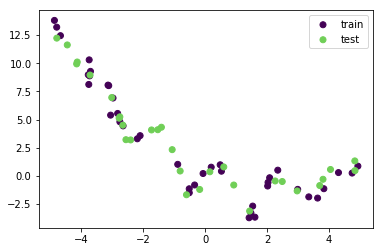

In [36]:
# raw data
plt.scatter(xtrain,ytrain, c=[cm(1)]*len(xtrain), label='train')
plt.scatter(xtest,ytest, c=[cm(200)]*len(xtest), label='test')
plt.legend()

In [5]:
def get_ols(X,y):
    return np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))

In [6]:
def MSE(y,y_pred):
    return np.sum((y-y_pred)**2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Train error:  274.6717912496013


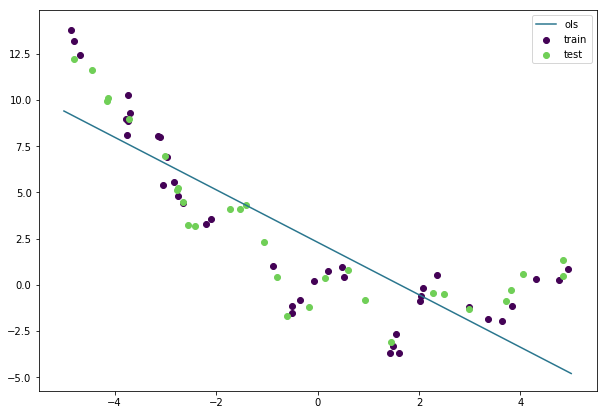

In [7]:
# simple OLS on the training set
plt.figure(figsize=(10,7))
x,y = xtrain, ytrain
X = np.hstack([np.ones((len(x),1)),x])
X_plot = np.hstack([np.ones((len(xplot),1)),xplot])
w_ols = get_ols(X,y)
plt.plot(xplot,np.dot(X_plot,w_ols), label="ols", c=cm(100))
plt.scatter(x,y, label="train", c=cm(1))
plt.scatter(xtest,ytest,c=cm(200), label='test')
plt.legend()
print('Train error: ', MSE(y,np.dot(X,w_ols)))

In [8]:
# ok, lets try to use different polynomials and find a good degree on the training set:
# define some polynomial basis functions

def get_poly_matrix(x_inp, deg=2):
    x = np.hstack([np.ones((len(x_inp),1)),x_inp])
    for i in range(2,deg+1):
        x = np.hstack([x, x_inp**i])
    return x

In [9]:
print(np.linalg.cond(get_poly_matrix(xtrain, deg=200)))

1.2714999459461513e+102


deg	train		test error
1	274.671791	203.280348
2	47.701441	37.465336
3	47.217819	37.990026
4	47.020171	38.262735
5	45.827899	41.541826
6	45.815723	41.624638
7	45.812573	41.736593
8	44.494529	45.932184
9	43.068930	45.402807
10	38.489966	63.664156
11	38.369077	62.901929
12	28.376401	106.283683
13	22.402816	65.239792
14	17.453264	153.517851
15	9.712319	20.406178
16	9.644455	19.838395
17	7.869306	14.921366
18	7.868412	14.767555
19	7.285312	87.376783
20	7.154316	196.305536
21	7.120350	376.688264
22	8.285913	2093.085901
23	7.352045	910.869808
24	7.006206	2461.713255
25	8.570155	9824.283484
26	6.866708	7489.102459
27	7.004196	8552.737385
28	7.175872	25935.985762
29	6.737403	5697.763498
30	7.642992	84956.387466
Best d:  18


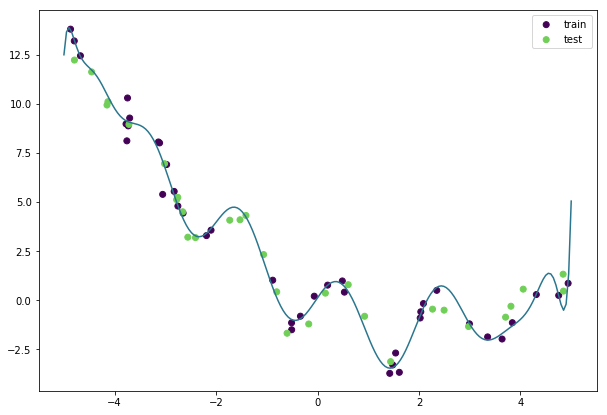

In [39]:
# lets iterate through the first five polynomial degrees
# the polynomials 3,4,5 are already hard to distinguish
plt.figure(figsize=(10,7))
plt.scatter(xtrain,ytrain, c=[cm(1)]*len(xtrain), label='train')
plt.scatter(xtest,ytest, c=[cm(200)]*len(xtest), label='test')
print("deg\ttrain\t\ttest error")
trainerr = []
testerr = []
degs = range(1,31)
for d in degs:
    X_poly = get_poly_matrix(xtrain,d)
    w = np.linalg.solve(np.dot(X_poly.T,X_poly), np.dot(X_poly.T,ytrain))
    ols = np.dot(X_poly,w)
    ols_test = np.dot(get_poly_matrix(xtest,d),w)
    tr = MSE(ytrain, ols)
    te = MSE(ytest, ols_test)
    trainerr.append((d,tr,w))
    testerr.append((d,te,w))
    print('{:d}\t{:f}\t{:f}'.format(d,tr,te))
plt.legend(loc='upper right')
testerr_sort = sorted(testerr, key=lambda tup: tup[1])
min_d_w = testerr_sort[0][2]
min_d = testerr_sort[0][0]
plt.plot(xplot,np.dot(get_poly_matrix(xplot,min_d),min_d_w), label="ols", c=cm(100))
print('Best d: ',min_d)

Text(0.5, 1.0, 'Error plotted against degree')

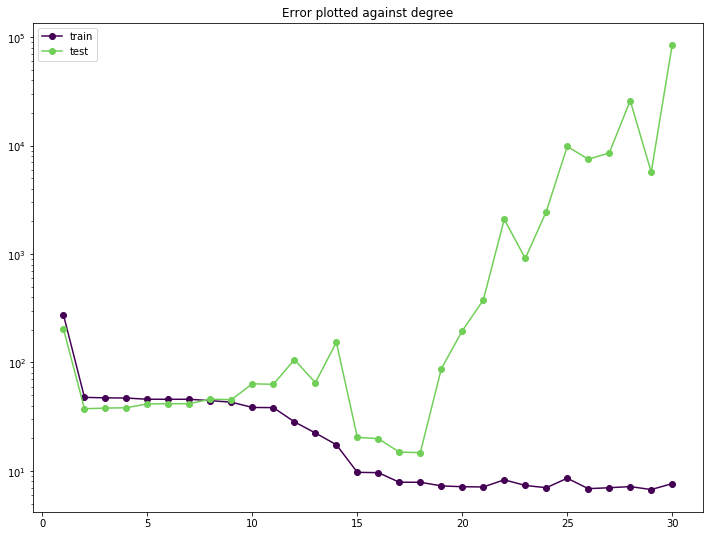

In [11]:
plt.figure(figsize=(12,9))
trainerr_val = [v[1] for v in trainerr]
testerr_val = [v[1] for v in testerr]
plt.plot(degs,trainerr_val,c=cm(0), marker='o',label='train')
plt.plot(degs,testerr_val,c=cm(200), marker='o', label='test')
plt.legend()
plt.yscale("log")
plt.title('Error plotted against degree')

## Ridge regression (L2-regularization)

The main idea behind Ridge regression is to penalize huge parameters to reduce overfitting. This is done by reformulating the loss:

$$ \text{Loss}_\text{Ridge}(w) = \sum_i (y_i-w^Tx_i)^2 + \lambda \lVert w \rVert, $$ where $\lambda$ is a hyperparameter, that needs to be determined using cross-validation.

The Ridge regression estimator is given by:

$$ w_\text{OLS} = (X^TX+\lambda I)^{-1}X^Ty $$

In [12]:
def get_ridge(X,y,la):
    d = X.shape[1]
    A = np.dot(X.T,X)+la*np.eye(d)
    b = np.dot(X.T,y)
    return np.linalg.solve(A,b )

18 Train error:  7.870410445791922
18 Test error:  14.676566913593716


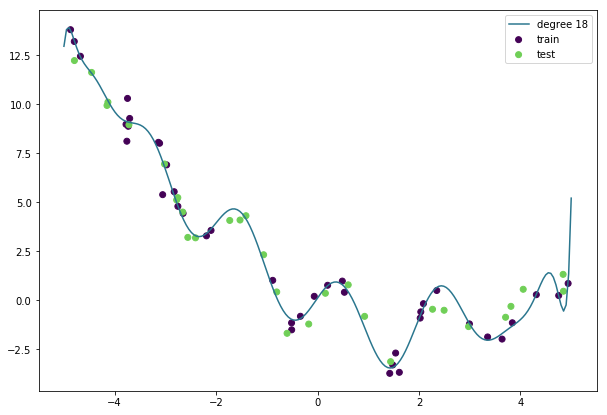

In [37]:
plt.figure(figsize=(10,7))
plt.scatter(xtrain, ytrain, label="train", c=[cm(1)]*len(xtrain))
plt.scatter(xtest, ytest,label="test", c=[cm(200)]*len(xtest))
d = 18
xpoly = get_poly_matrix(xtrain, d)
alpha = 0.001 # regularization parameter
w_ridge = get_ridge(xpoly, ytrain, alpha)
ridge = np.dot(xpoly, w_ridge)
ridge_test = np.dot(get_poly_matrix(xtest,d), w_ridge)
plt.plot(xplot,np.dot(get_poly_matrix(xplot,d),w_ridge), label="degree %d" % d, c=cm(100))
plt.legend()
print(d, 'Train error: ', MSE(ytrain, ridge))
print(d, 'Test error: ', MSE(ytest,ridge_test))

# Outlook Regression

## SVR

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Support Vector Regression')

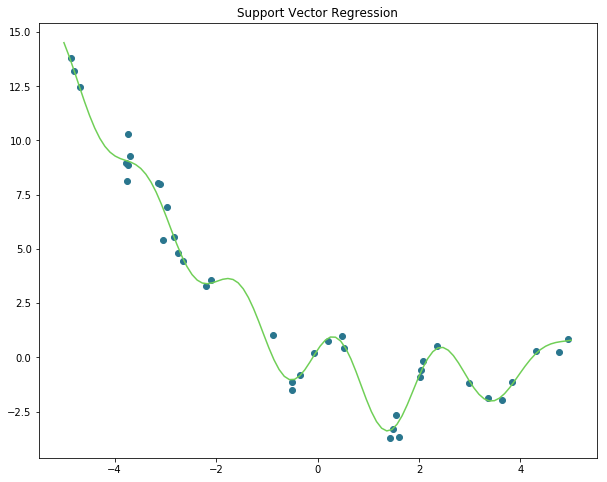

In [50]:
from sklearn import datasets, linear_model, svm, gaussian_process, neighbors

x_t = np.linspace(-5,5,100)[:,np.newaxis]
plt.figure(figsize=(10,8))
kernel = gaussian_process.kernels.ConstantKernel() * gaussian_process.kernels.RBF()
plt.scatter(xtrain,ytrain,c=cm(100))
reg = svm.SVR(kernel=kernel, C=1e2, gamma=0.1)
reg.fit(x, np.ravel(ytrain))
plt.plot(x_t, reg.predict(x_t), c=cm(200), label="svr")

plt.title('Support Vector Regression')

## KNN-Regression


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'KNN-Regression')

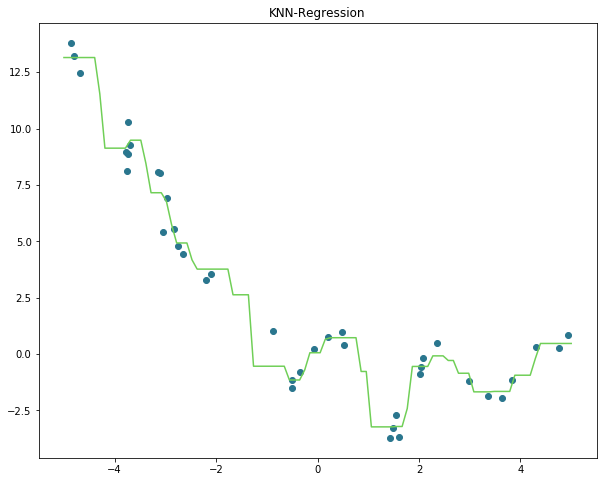

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(xtrain,ytrain,c=cm(100))
regknn = neighbors.KNeighborsRegressor(3)
regknn.fit(x, np.ravel(y))
plt.plot(x_t, regknn.predict(x_t), c=cm(200), label="KNN")
plt.title('KNN-Regression')

## Gaussian Processes

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(100,)


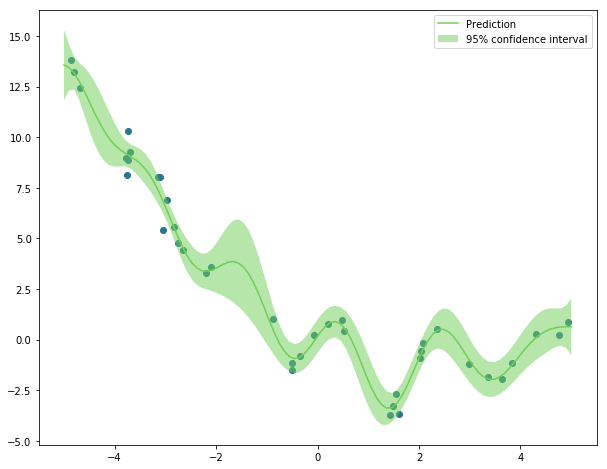

In [35]:
plt.figure(figsize=(10,8))
kernel = gaussian_process.kernels.ConstantKernel() * gaussian_process.kernels.RBF()
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel, alpha=0.5, n_restarts_optimizer=20)
gp.fit(xtrain, ytrain)
y_pred, sigma = gp.predict(x_t, return_std=True)
plt.plot(x_t, y_pred, c=cm(200), label='Prediction')
y_pred = y_pred.reshape(-1)
plt.fill(np.concatenate([x_t, x_t[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc=cm(200), ec='None', label='95% confidence interval')
plt.legend()
print(y_pred.shape)
plt.scatter(xtrain,ytrain,c=cm(100))

More on Gaussian Processes soon...